# Setting everything up
We start by importing the pandas library:

In [1]:
import pandas as pd

Then we load the dataset from the provided URL and we create a dataframe out of it:

In [2]:
url = "http://codeandbeer.org/virtual/BigData/Datasets/iris.data"
df = pd.read_csv(url)

We check if the data has been loaded and the dataframe has been created successfully:

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Everything looks good so far!

# Problem identification
First, we must look at the resulting dataframe and its format for problems.

After some contextual research, we figured out that this is a well-known dataset, called the ["*Iris flower data set"*](https://en.wikipedia.org/wiki/Iris_flower_data_set) by *Ronald Fisher*. 

Knowing this helps us to understand the nature of the data we have, as well as to understand the purpose of each of the stored values, in order to design an appropriate solution in the process of cleaning and preparing the data. 

So far, these are the identified problems that we will solve throughout this exercise: 



# Fixing column names
The first problem that we notice is that there aren't column names. Instead, the first row has been interpreted as a column name as we can see here:

In [4]:
list(df.columns.values)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']

It is important to preserve the column of information that has been interpreted as the index names of the columns before renaming them, because otherwise the first row of information would be lost. 

The fastest way to do this is to simply load the dataframe again, this time using the parameter `header=None`, so that it is interpreted that the first row of the dataset is not the column names, since there is no header at all.

In [5]:
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Setting a more accurate header
After checking the original Iris flower data set by Ronald Fisher, we have figured out the meaning of the data stored in the data set. 

This way, we know the first two columns are relative to the length and the width of the sepals of each flower, while the third and fourth columns are relative to the length and the width of the petals, all in centimeters. The last column is the class to which each flower belongs. 

We will perform a more accurate naming of the header categories:

In [6]:
df.columns = ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)', 'Class']
df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Fixing the class names
If we look at the category 'Class' in our dataframe, we see three classes of flower:

In [7]:
column_values = df[["Class"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


However, it is possible to carry out a somewhat more visually appealing naming for the user who consults our dataset data.

In this case, we will replace the `Iris-` part with "*I. "*, obviating the Iris species of our dataset (because all the flowers analyzed belong to this category), while emphasizing the part of the scientific name that varies according to the classes covered by the dataset. 

In [8]:
df['Class'] = df['Class'].str.replace('Iris-','I. ')
df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Class
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


We check that all the resulting classes present the new stipulated format:

In [9]:
column_values = df[["Class"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

['I. setosa' 'I. versicolor' 'I. virginica']


Our dataset now has a much cleaner and understandable format, ready to be both processed and consulted. 

# Data exploration
We will perform an exploratory analysis of the data we prepared. 

First, we will import the required libraries:

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

We set the style for the plots that are going to be generated:

In [15]:
sns.set(style="white", color_codes=True)

Now we are ready to generate some visual representations of our data.

## Pair plot

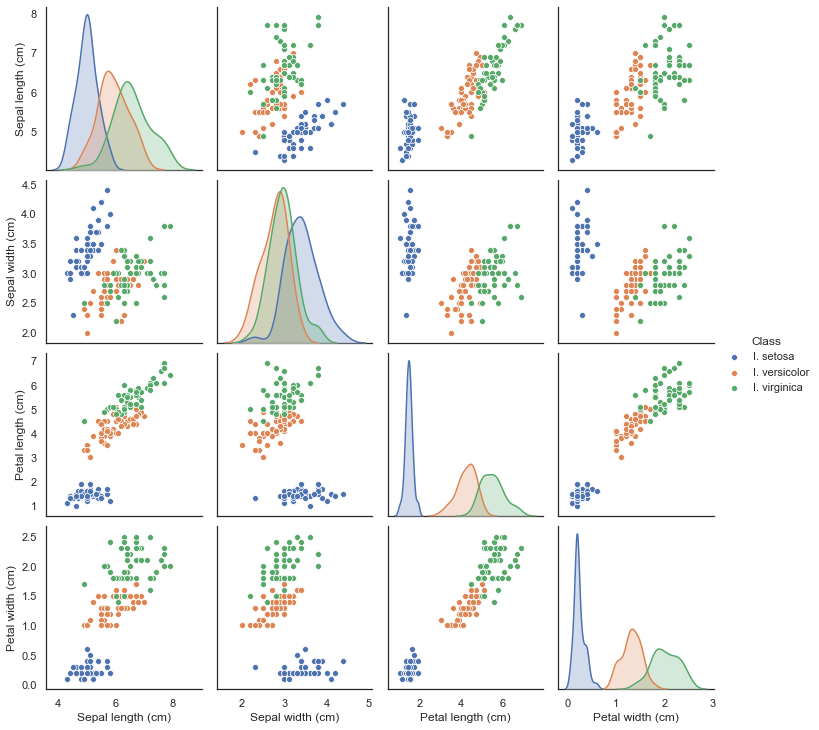

In [12]:
sns.pairplot(df, hue="Class")

## Linear model plot (classes)

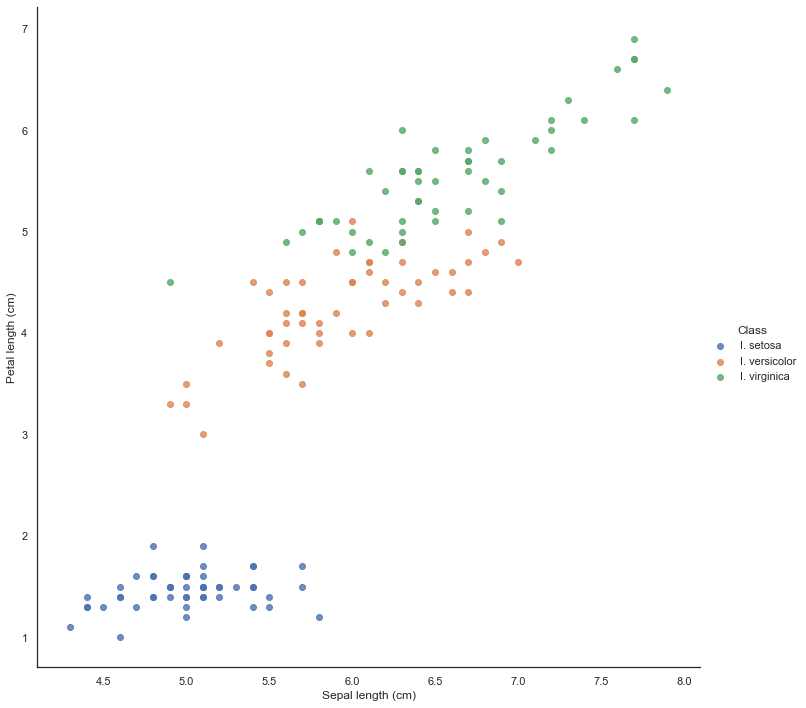

In [13]:
sns.lmplot(x='Sepal length (cm)', y='Petal length (cm)', hue='Class', data=df, fit_reg=False,height=10)

## Factor plot

C:\ProgramData\Anaconda3\envs\DataScienceAssignment\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\envs\DataScienceAssignment\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


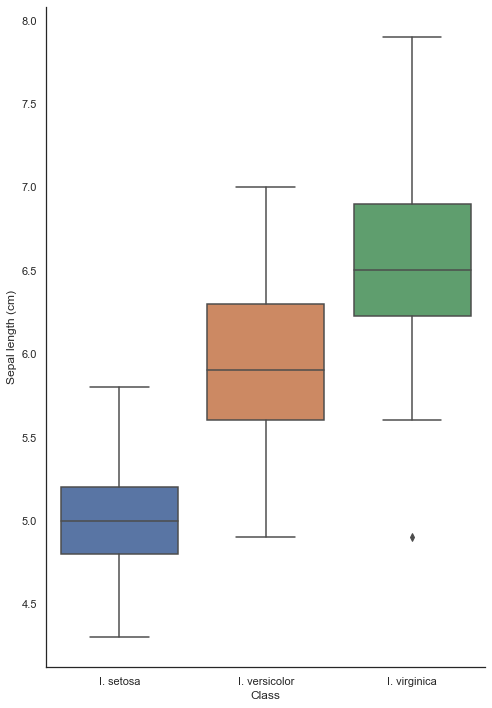

In [14]:
sns.factorplot(x="Class", y="Sepal length (cm)", data=df, kind="box", size=10, aspect=.7)